Populating the interactive namespace from numpy and matplotlib


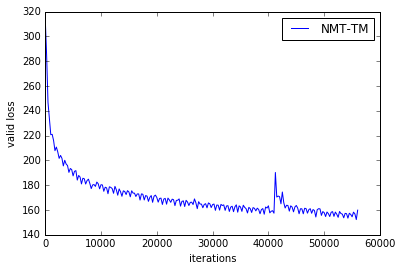

1.79497134686 -3.73821902275


In [10]:
%pylab inline
import pylab as plt
import numpy as np
data = np.load('./.model/TM2.B7.latest4_ende_bpe_latest.ss.32-80.npz')
errors = data['history_errs']
plt.plot([250 * a for a in range(len(errors))], errors, label='NMT-TM')


plt.xlabel('iterations')
plt.ylabel('valid loss')
#plt.ylim([20, 40])
#plt.xlim([0, 20000])
plt.legend(loc='upper right')
plt.show()

print data['tau'], data['map_bi_b']
# ax = sns.heatmap(data3['map_bi_Md'][:, None], xticklabels=False, yticklabels=False)
plt.show()

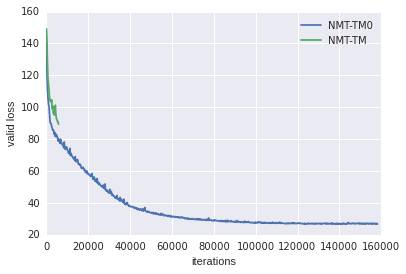

In [51]:
data = np.load('/root/disk/scratch/model-tmnmt/TM2.v6_fren.ss.32-50.npz')
errors = data['history_errs']
plt.plot([250 * a for a in range(len(errors))], errors, label='NMT-TM0')
data = np.load('/root/disk/scratch/model-tmnmt/10_fren.ss.32-50.npz')
errors = data['history_errs']
plt.plot([250 * a for a in range(len(errors))], errors, label='NMT-TM')

plt.xlabel('iterations')
plt.ylabel('valid loss')
#plt.ylim([20, 40])
#plt.xlim([0, 5000])
plt.legend(loc='upper right')
plt.show()

In [105]:
home = '.dataset/wmt15.ende/'
import editdistance as ed
train_en = open(home + 'train/train.en.top5.tok.bpe').readlines()
print 'ok'
train_mat_en = open(home + 'train/train.en.top5.matched.tok.bpe').readlines()
print 'ok'

ok
ok


In [96]:
def fuzzy(a, b):
    Lmax = float(max(len(a), len(b)))
    return 1 - ed.eval(a, b)/Lmax

In [106]:
scores = [fuzzy(train_en[k].strip().split(), train_mat_en[k].strip().split()) for k in range(len(train_en))]
print 'ok'

ok


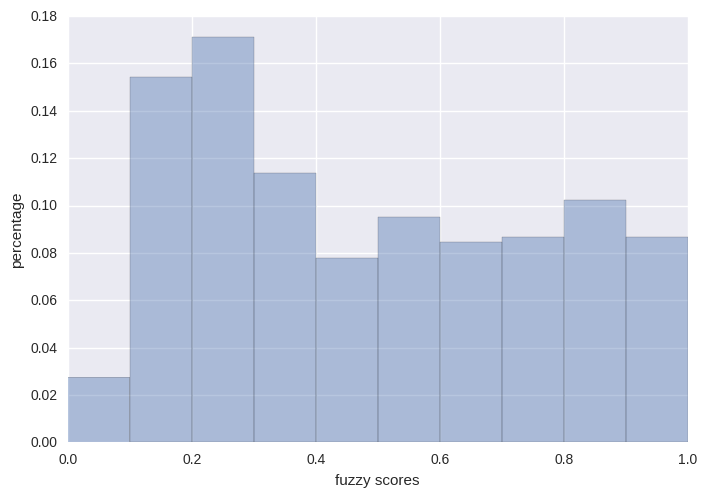

In [104]:
plt.hist(scores, bins=10, alpha=0.4, weights=np.ones_like(scores)/float(len(scores)))
plt.xlabel('fuzzy scores'); plt.ylabel('percentage')
plt.show()

In [100]:
pkl.dump(scores, open('wmt.ende.stat.pkl', 'w'))

In [102]:
home = '.dataset/top5k.fren.bpe/'

import editdistance as ed
train_en = open(home + 'train.en.top5.shuf.tok.bpe').readlines()
print 'ok'
train_mat_en = open(home + 'train.en.top5.matched.shuf.tok.bpe').readlines()
print 'ok'

scores2 = [fuzzy(train_en[k].strip().split(), train_mat_en[k].strip().split()) for k in range(len(train_en))]
print 'ok'

ok
ok
ok


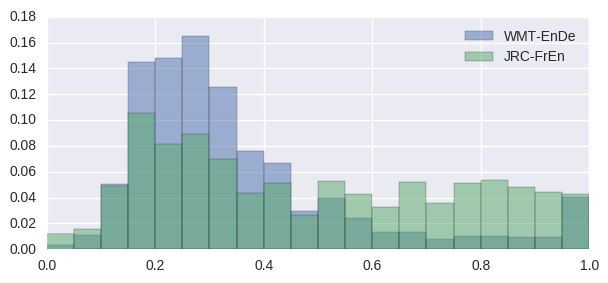

In [118]:
plt.figure(figsize=(7, 3))
plt.hist(scores,  bins=20, alpha=0.5, weights=np.ones_like(scores) /float(len(scores)),  label='WMT-EnDe')
plt.hist(scores2, bins=20, alpha=0.5, weights=np.ones_like(scores2)/float(len(scores2)), label='JRC-FrEn')
#plt.xlabel('fuzzy scores'); plt.ylabel('percentage')
plt.legend(loc='upper right')
plt.savefig('example_dist_train.pdf')
plt.show()

In [132]:
print numpy.sum(numpy.array(scores)==1)

163967
